# Support Vector Machine

Support vector machine or SVM is another one of the most widely used algorithm for classification.

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
import plotly.express as px
import plotly.io as pio
svg_renderer = pio.renderers["svg"]
svg_renderer.width = 800
svg_renderer.height = 500
pio.renderers.default = "svg"

## Model without oversample data

In [2]:
# Load the data
df = pd.read_csv('./../../data/engineered_data.csv')

In [3]:
# Drop the index column
df.drop('Unnamed: 0', axis=1, inplace=True)

Before modelinng the data, it is necessary to split the data into training and testing set.

In [4]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('state', axis=1), df['state'], test_size=0.2, random_state=42)

### Model Building

In [9]:
# Declare the SVM model without 'poly' kernel
svm_clf = SVC(probability=True, class_weight='balanced')

# Declare the grid paramters to be searched
svm_params = dict(
    C = np.logspace(-4, 0, num=5),
    kernel = ['linear', 'rbf', 'sigmoid']
)

In [14]:
# For training SVM without 'poly' kernel

# Declare the gridsearch object
grid_search = GridSearchCV(svm_clf, svm_params, scoring='roc_auc', n_jobs=7, refit=True, cv=10, verbose=3)

# Fit the model
grid_result = grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV 2/10] END ............C=0.01, kernel=linear;, score=0.929 total time= 3.2min
[CV 3/10] END ............C=0.01, kernel=linear;, score=0.940 total time= 3.2min
[CV 1/10] END ............C=0.01, kernel=linear;, score=0.938 total time= 3.2min
[CV 4/10] END ............C=0.01, kernel=linear;, score=0.938 total time= 3.2min
[CV 5/10] END ............C=0.01, kernel=linear;, score=0.941 total time= 3.2min
[CV 6/10] END ............C=0.01, kernel=linear;, score=0.945 total time= 3.2min
[CV 7/10] END ............C=0.01, kernel=linear;, score=0.930 total time= 3.2min
[CV 3/10] END ...............C=0.01, kernel=rbf;, score=0.533 total time= 1.1min
[CV 2/10] END ...............C=0.01, kernel=rbf;, score=0.514 total time= 1.2min
[CV 1/10] END ...............C=0.01, kernel=rbf;, score=0.502 total time= 1.2min
[CV 4/10] END ...............C=0.01, kernel=rbf;, score=0.514 total time= 1.2min
[CV 5/10] END ...............C=0.01, kernel=rb

KeyboardInterrupt: 

In [ ]:
# Declare the SVM model with 'poly' kernel
svm_clf_poly = SVC(probability=True, class_weight='balanced', kernel='poly')

# Declare the grid paramters to be searched
svm_params_poly = dict(
    C = np.logspace(-4, 0, num=5),
    degree = [2, 3, 4]
)

In [ ]:
# For training SVM without 'poly' kernel

# Declare the gridsearch object
grid_search_poly = GridSearchCV(svm_clf_poly, svm_params_poly, scoring='roc_auc', n_jobs=7, refit=True, cv=10, verbose=5)

# Fit the model
grid_result_poly = grid_search.fit(X_train, y_train)

NameError: name 'svm_clf_poly' is not defined

### Inferencing

In [13]:
# Get the best model parameters
print(f"Best score of {grid_result.best_score_} is achieved by using {grid_result.best_params_}")

NameError: name 'grid_result' is not defined

In [ ]:
# Predict on test data using the model
y_pred = grid_search.predict(X_test)
y_score = grid_search.predict_proba(X_test)[:, 1]

### Evaluation

In [ ]:
# Find the ROC AUC score
print(f"Area under the ROC curve: {roc_auc_score(y_test, y_score)}")

Area under the ROC curve: 0.8827668709253439


In [ ]:
# Calculate parameters for roc auc curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)

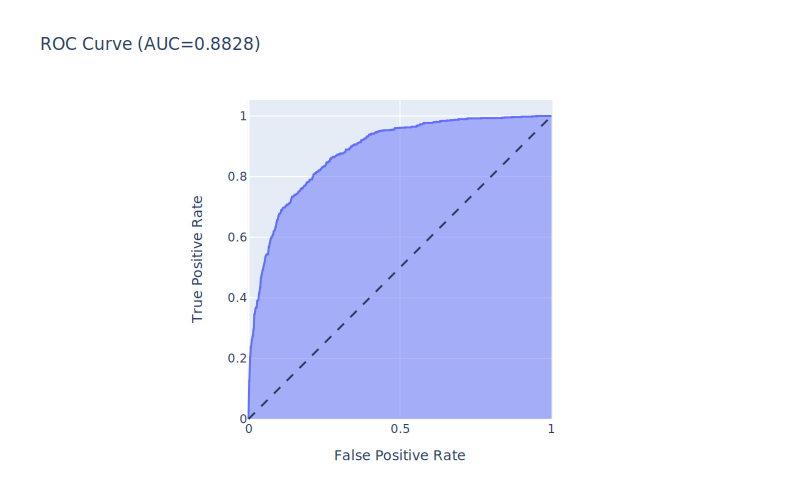

In [ ]:
# Plot the curve and area under the curve
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate')
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

An AUC score of 0.88 is quite remarkable and it suggest that model is quite good in predicting whether a project on Kickstarter will be succecssful or not.

In [ ]:
# Create a ROC dataframe from the obtained FPR and TPR
roc_df = pd.DataFrame({
    'fpr': fpr,
    'tpr': tpr,
    'threshold': thresholds
})

In [ ]:
# Get the values of threshold for true positive rate between 0.79 and 0.81
roc_df[roc_df['tpr'].between(0.79, 0.81)]

,fpr,tpr,threshold
406,0.201813,0.790194,0.480727
407,0.209447,0.790194,0.478962
408,0.209447,0.792474,0.478820
409,0.209924,0.792474,0.478810
410,0.209924,0.793615,0.478781
411,0.210401,0.793615,0.478701
412,0.210401,0.795895,0.478480
413,0.210878,0.795895,0.478390
414,0.210878,0.797035,0.477720
415,0.212309,0.797035,0.477548


From the above table, it is safe to assume the threshold value of 0.5 for classifying the observations.

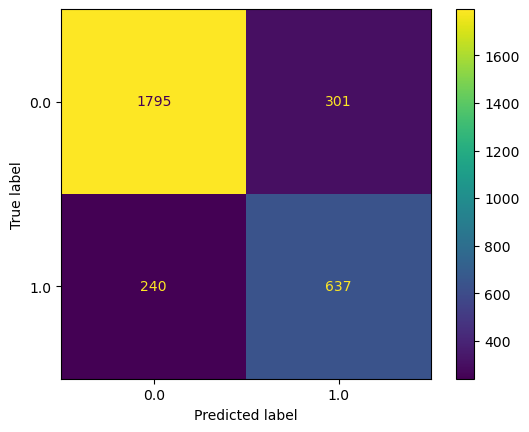

In [ ]:
# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(grid_result, X_test, y_test)  

In [ ]:
# Save the model
joblib.dump(grid_result, './../../data/models/svm.pkl')
joblib.dump(grid_result, './../../data/models/svm.pkl')

## Model with oversample data

In [ ]:
# Load the data
df = pd.read_csv('./../../data/engineered_data_oversampled.csv')

In [ ]:
# Drop the index column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('state', axis=1), df['state'], test_size=0.2, random_state=42)

### Model Building

In [ ]:
# Declare the SVM model
svm_clf = SVC(probability=True, class_weight='balanced')

# Declare the grid paramters to be searched
svm_params = dict(
    C = np.logspace(-3, 0, num=4),
    kernel = ['linear', 'rbf', 'sigmoid']
)

In [ ]:
# Declare the gridsearch object
grid_search = GridSearchCV(svm_clf, svm_params, scoring='roc_auc', n_jobs=7, refit=True, cv=10, verbose=5)

# Fit the model
grid_result = grid_search.fit(X_train, y_train)

### Inferencing

In [ ]:
# Get the best model parameters
print(f"Best score of {grid_result.best_score_} is achieved by using {grid_result.best_params_}")

Best score of 0.9006621074457278 is achieved by using {'C': 10000.0, 'l1_ratio': 1, 'max_iter': 500}


In [ ]:
# Predict on test data using the model
y_pred = grid_search.predict(X_test)
y_score = grid_search.predict_proba(X_test)[:, 1]

### Evaluation

In [ ]:
# Find the ROC AUC score
print(f"Area under the ROC curve: {roc_auc_score(y_test, y_score)}")

Area under the ROC curve: 0.899628893635461


With the new oversampled data, there is a marginal improvement in the performance of the logistic regression algorithm.

In [ ]:
# Calculate parameters for roc auc curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)

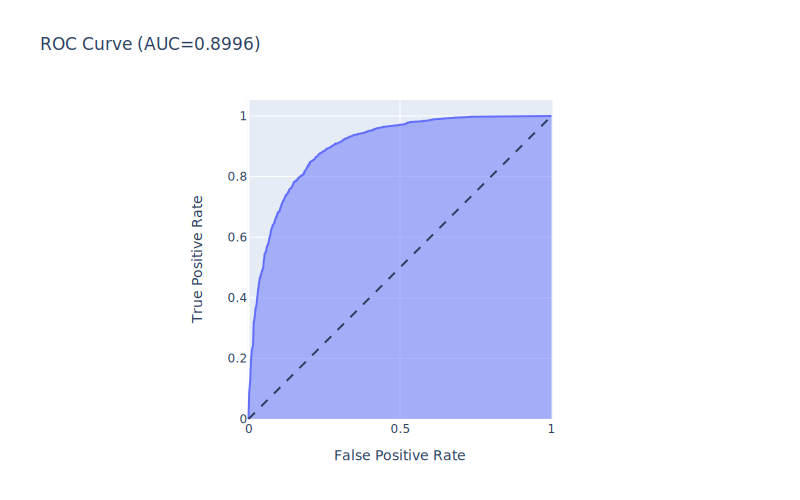

In [ ]:
# Plot the curve and area under the curve
fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate')
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [ ]:
# Create a ROC dataframe from the obtained FPR and TPR
roc_df = pd.DataFrame({
    'fpr': fpr,
    'tpr': tpr,
    'threshold': thresholds
})

In [ ]:
# Get the values of threshold for true positive rate between 0.79 and 0.81
roc_df[roc_df['tpr'].between(0.79, 0.81)]

,fpr,tpr,threshold
500,0.161151,0.790743,0.481897
501,0.161631,0.790743,0.481852
502,0.161631,0.791236,0.481701
503,0.162110,0.791236,0.481684
504,0.162110,0.791728,0.481599
505,0.163070,0.791728,0.481566
506,0.163070,0.794190,0.480795
507,0.163549,0.794190,0.480781
508,0.163549,0.795175,0.480576
509,0.164029,0.795175,0.480549


For this data set also, it is safe to assume the threshold of 0.5.

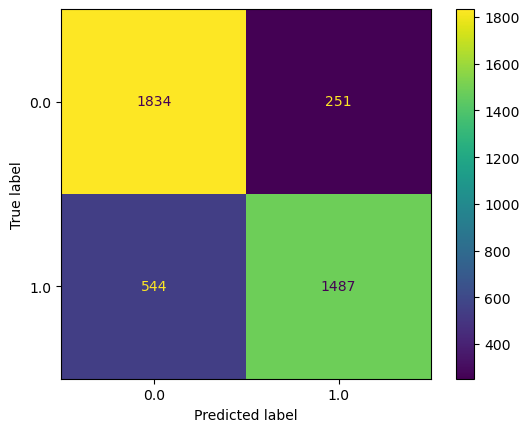

In [ ]:
# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(grid_result, X_test, y_test)  

In [ ]:
# Save the model
joblib.dump(grid_result, './../../data/models/svm_oversample.pkl')

['./../../data/models/logistic_regression_oversample.pkl']